2025-10-27 15:03:49.704 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 15:03:49.707 No runtime found, using MemoryCacheStorageManager
2025-10-27 15:03:49.709 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 15:03:49.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 15:03:49.712 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 15:03:49.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 15:03:50.215 Thread 'Thread-6': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 15:03:50.216 Thread 'Thread-6': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 15:03:50.217 Thread 'Thread-6': missi

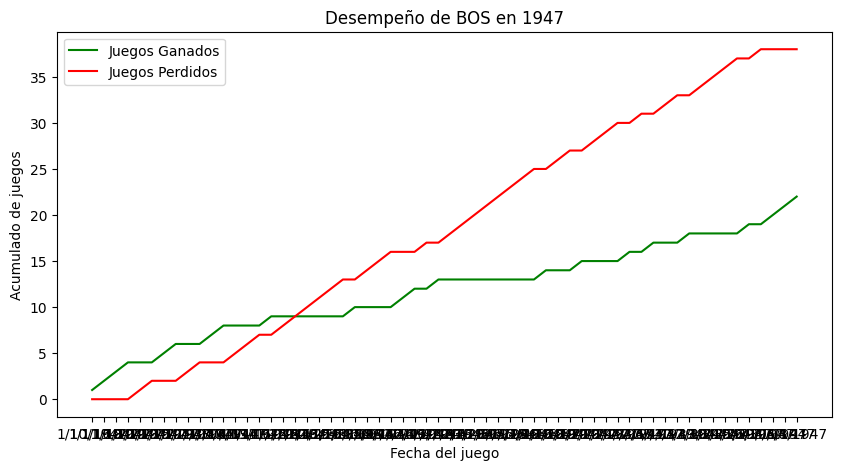

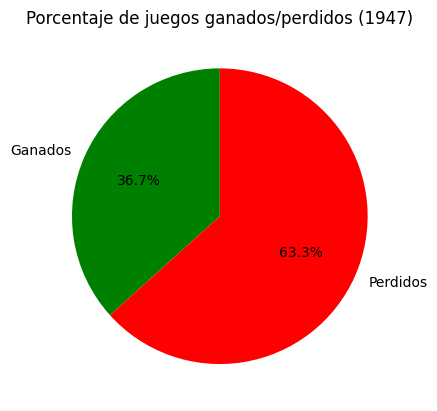

In [6]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Configuración de la página
st.set_page_config(page_title="NBA Dashboard", layout="wide")

# Cargar datos
@st.cache_data
def load_data():
    df = pd.read_csv("/content/drive/MyDrive/Datasets/nba_all_elo.csv")
    return df

df = load_data()

# ---- Barra lateral ----
st.sidebar.title("Filtros")

# Años disponibles
years = sorted(df["year_id"].unique())
selected_year = st.sidebar.selectbox("Selecciona un año", years)

# Filtrar por año
df_year = df[df["year_id"] == selected_year]

# Equipos disponibles en ese año
teams = sorted(df_year["team_id"].unique())
selected_team = st.sidebar.selectbox("Selecciona un equipo", teams)

# Tipo de juego
tipo_juego = st.sidebar.radio(
    "Tipo de juego",
    ["Temporada regular", "Playoffs", "Ambos"],
    index=0,
    horizontal=True
)

# ---- Filtrado principal ----
df_team = df_year[df_year["team_id"] == selected_team]

if tipo_juego == "Temporada regular":
    df_team = df_team[df_team["is_playoffs"] == 0]
elif tipo_juego == "Playoffs":
    df_team = df_team[df_team["is_playoffs"] == 1]

# ---- Cálculo de acumulados ----
df_team = df_team.sort_values("date_game")
df_team["wins_cumulative"] = (df_team["game_result"] == "W").cumsum()
df_team["losses_cumulative"] = (df_team["game_result"] == "L").cumsum()

# ---- Gráfica de líneas ----
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_team["date_game"], df_team["wins_cumulative"], label="Juegos Ganados", color="green")
ax.plot(df_team["date_game"], df_team["losses_cumulative"], label="Juegos Perdidos", color="red")
ax.set_xlabel("Fecha del juego")
ax.set_ylabel("Acumulado de juegos")
ax.set_title(f"Desempeño de {selected_team} en {selected_year}")
ax.legend()
st.pyplot(fig)

# ---- Gráfica de pastel ----
total_juegos = len(df_team)
ganados = sum(df_team["game_result"] == "W")
perdidos = sum(df_team["game_result"] == "L")

fig2, ax2 = plt.subplots()
ax2.pie(
    [ganados, perdidos],
    labels=["Ganados", "Perdidos"],
    autopct="%1.1f%%",
    colors=["green", "red"],
    startangle=90
)
ax2.set_title(f"Porcentaje de juegos ganados/perdidos ({selected_year})")
st.pyplot(fig2)

# ---- Mostrar resumen ----
st.markdown(f"### Resumen de temporada {selected_year}")
st.write(f"**Equipo:** {selected_team}")
st.write(f"**Tipo de juego:** {tipo_juego}")
st.write(f"**Total de juegos:** {total_juegos}")
st.write(f"**Ganados:** {ganados}")
st.write(f"**Perdidos:** {perdidos}")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.9 MB/s eta 0:00:00
